In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import os
os.environ['KAGGLE_USERNAME']= 'kshitijpandey22'
os.environ['KAGGLE_KEY']= '137378613efdf325c005cea4a8264935'

In [3]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 92% 190M/207M [00:01<00:00, 111MB/s]
100% 207M/207M [00:01<00:00, 115MB/s]


In [4]:
!unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [5]:
main_dir='/content/New Masks Dataset'
test_dir=os.path.join(main_dir,'Test')
train_dir=os.path.join(main_dir,'Train')
valid_dir=os.path.join(main_dir,'Validation')
train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'Non Mask')

In [6]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

['1556.jpg', '0113.jpg', '0171.jpg', '1338.jpg', '0158.jpg', '1471.jpg', '1096.jpg', '0481.jpg', '0770.jpg', '0784.jpg']


In [7]:
train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['114.jpg', '201.jpg', '178.jpg', '352.jpg', '89.jpg', '302.jpg', '259.jpg', '300.jpg', '124.jpg', '15.jpg']


In [8]:
nrows = 4
ncols = 4
plt.figure(figsize = (12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [9]:
mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir, i))
print(mask_pic)  


['/content/New Masks Dataset/Train/Mask/1556.jpg', '/content/New Masks Dataset/Train/Mask/0113.jpg', '/content/New Masks Dataset/Train/Mask/0171.jpg', '/content/New Masks Dataset/Train/Mask/1338.jpg', '/content/New Masks Dataset/Train/Mask/0158.jpg', '/content/New Masks Dataset/Train/Mask/1471.jpg', '/content/New Masks Dataset/Train/Mask/1096.jpg', '/content/New Masks Dataset/Train/Mask/0481.jpg']


In [10]:
nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir, i))
print(nomask_pic)


['/content/New Masks Dataset/Train/Non Mask/114.jpg', '/content/New Masks Dataset/Train/Non Mask/201.jpg', '/content/New Masks Dataset/Train/Non Mask/178.jpg', '/content/New Masks Dataset/Train/Non Mask/352.jpg', '/content/New Masks Dataset/Train/Non Mask/89.jpg', '/content/New Masks Dataset/Train/Non Mask/302.jpg', '/content/New Masks Dataset/Train/Non Mask/259.jpg', '/content/New Masks Dataset/Train/Non Mask/300.jpg']


In [11]:
merged_list = mask_pic + nomask_pic
print(merged_list)

['/content/New Masks Dataset/Train/Mask/1556.jpg', '/content/New Masks Dataset/Train/Mask/0113.jpg', '/content/New Masks Dataset/Train/Mask/0171.jpg', '/content/New Masks Dataset/Train/Mask/1338.jpg', '/content/New Masks Dataset/Train/Mask/0158.jpg', '/content/New Masks Dataset/Train/Mask/1471.jpg', '/content/New Masks Dataset/Train/Mask/1096.jpg', '/content/New Masks Dataset/Train/Mask/0481.jpg', '/content/New Masks Dataset/Train/Non Mask/114.jpg', '/content/New Masks Dataset/Train/Non Mask/201.jpg', '/content/New Masks Dataset/Train/Non Mask/178.jpg', '/content/New Masks Dataset/Train/Non Mask/352.jpg', '/content/New Masks Dataset/Train/Non Mask/89.jpg', '/content/New Masks Dataset/Train/Non Mask/302.jpg', '/content/New Masks Dataset/Train/Non Mask/259.jpg', '/content/New Masks Dataset/Train/Non Mask/300.jpg']


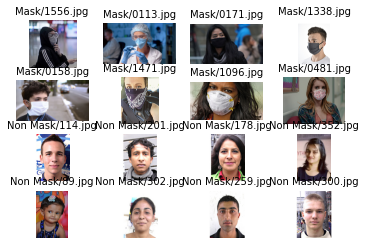

In [12]:
for i in range(0, len(merged_list)):
  data = merged_list[i].split('/', 4)[4]
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data, fontsize = 10)
  sp.imshow(image, cmap = 'gray')




In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, rotation_range = 40, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150,150), batch_size=32, class_mode='binary')
valid_generator = validation_datagen.flow_from_directory(valid_dir, target_size = (150,150), batch_size=32, class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [14]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [15]:
train_generator.image_shape

(150, 150, 3)

In [16]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), padding = 'SAME', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(Adam(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [17]:
history=model.fit(train_generator, epochs=30, validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 45s 685ms/step - loss: 4.7617 - accuracy: 0.4900 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 12s 630ms/step - loss: 0.6927 - accuracy: 0.5271 - val_loss: 0.6741 - val_accuracy: 0.7582
Epoch 3/30
19/19 [==============================] - 12s 637ms/step - loss: 0.5539 - accuracy: 0.7448 - val_loss: 0.4337 - val_accuracy: 0.8758
Epoch 4/30
19/19 [==============================] - 12s 644ms/step - loss: 0.4155 - accuracy: 0.8072 - val_loss: 0.3623 - val_accuracy: 0.8922
Epoch 5/30
19/19 [==============================] - 12s 651ms/step - loss: 0.3401 - accuracy: 0.8815 - val_loss: 0.3232 - val_accuracy: 0.9183
Epoch 6/30
19/19 [==============================] - 12s 646ms/step - loss: 0.3492 - accuracy: 0.8825 - val_loss: 0.2902 - val_accuracy: 0.8987
Epoch 7/30
19/19 [==============================] - 12s 642ms/step - loss: 0.3094 - accuracy: 0.8909 - val_loss: 0.3035 - val_accuracy: 0.8922

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

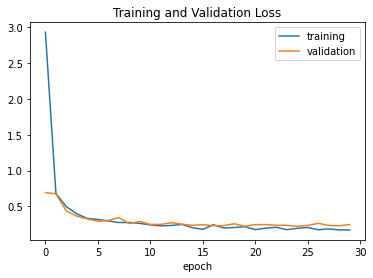

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epochs')

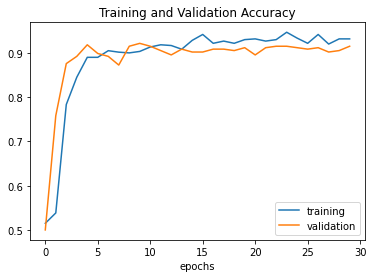

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')

In [21]:
test_loss, test_acc = model.evaluate(test_generator)
print('test_loss:{} test_acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 268ms/step - loss: 0.1883 - accuracy: 0.8900
test_loss:0.18825913965702057 test_acc:0.8899999856948853


In [25]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img=image.load_img(img_path, target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images, axis=0)
  prediction=model.predict(images)
  print(fname)
  if prediction == 0:
    print('Mask')
  else:
    print('No Mask')

Saving suprised-man.jpg to suprised-man.jpg
Saving 960x0 (1).jpg to 960x0 (1).jpg
Saving 960x0.jpg to 960x0.jpg
suprised-man.jpg
No Mask
960x0 (1).jpg
Mask
960x0.jpg
Mask


In [23]:
model.save('model.h5')